In [ ]:
import pandas as pd
pima = pd.read_csv('diabetes.csv')

In [ ]:
pima.shape

(768, 9)

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [ ]:
pima_all.shape

(392, 9)

In [ ]:
pima_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pima_all[['Insulin']]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# Z-score Scaling
z_score_scaler = StandardScaler()
data_standardized = z_score_scaler.fit_transform(data)

In [ ]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


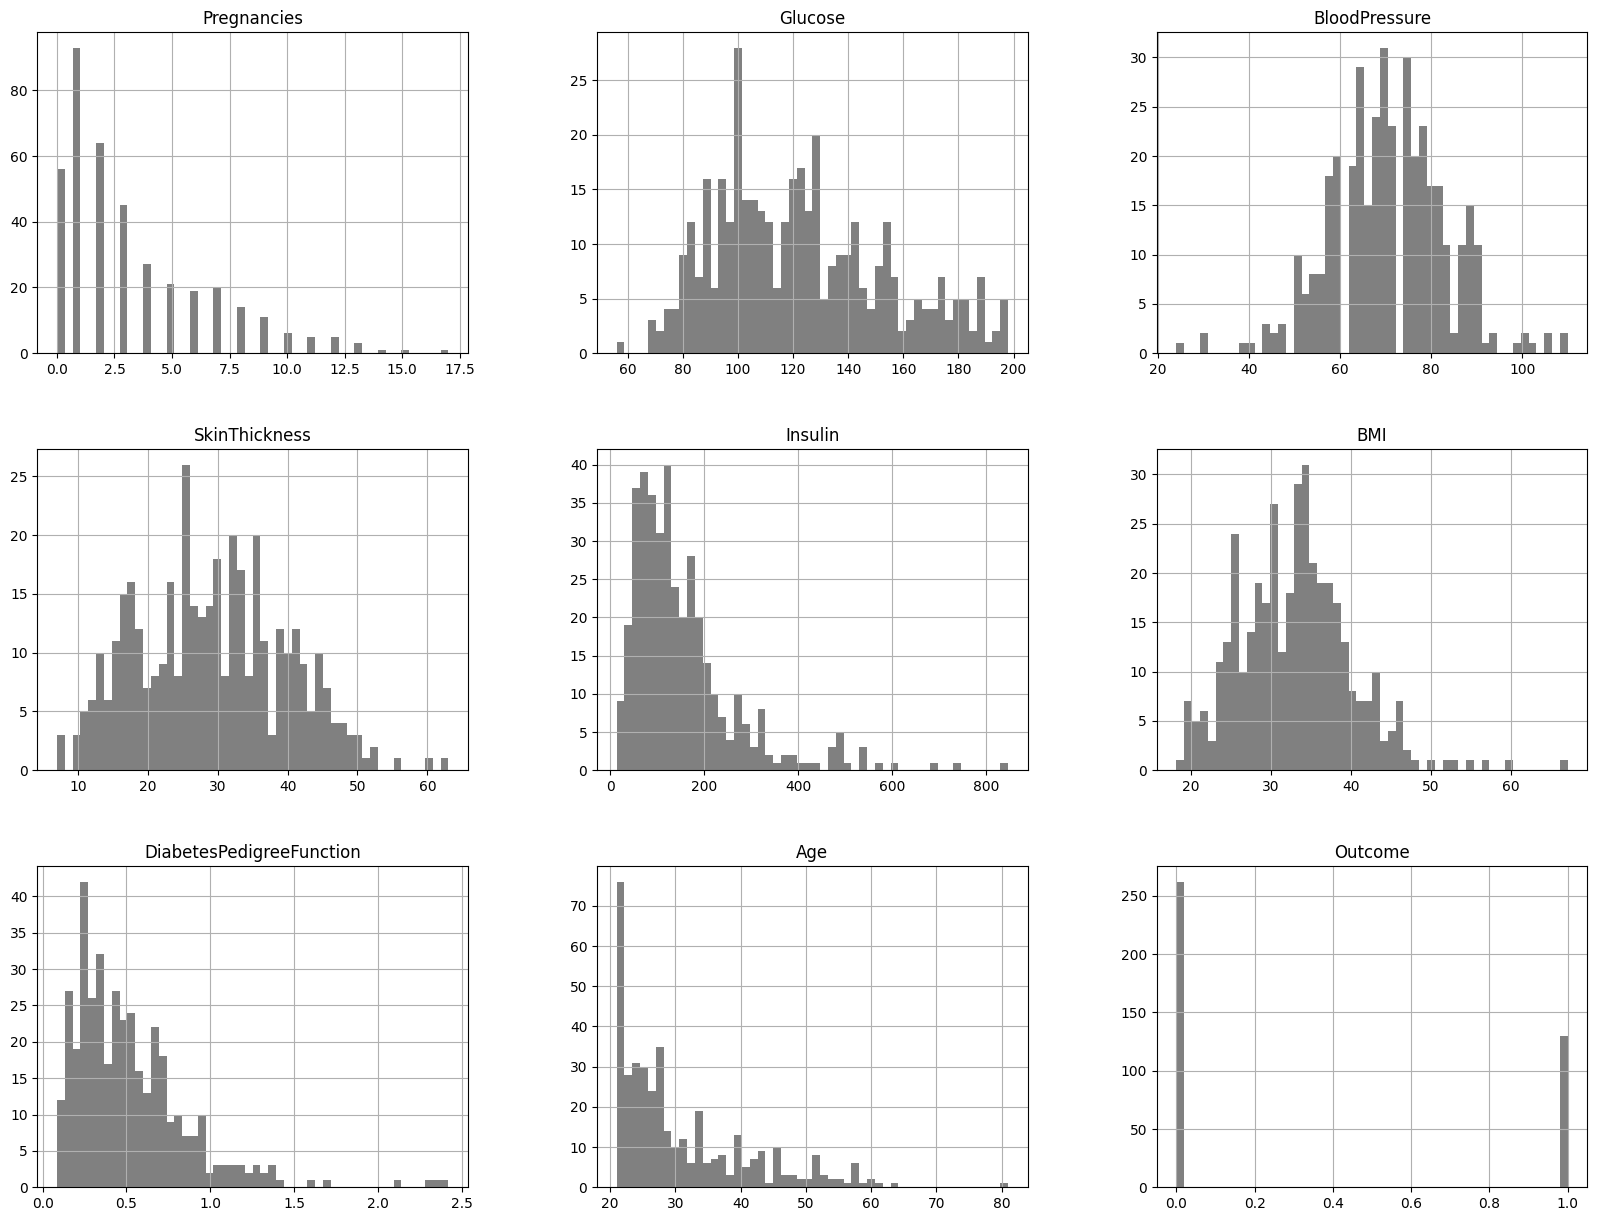

In [ ]:
import matplotlib.pyplot as plt
pima_all.hist(bins=50, figsize=(20, 15), color = 'gray')
plt.show()

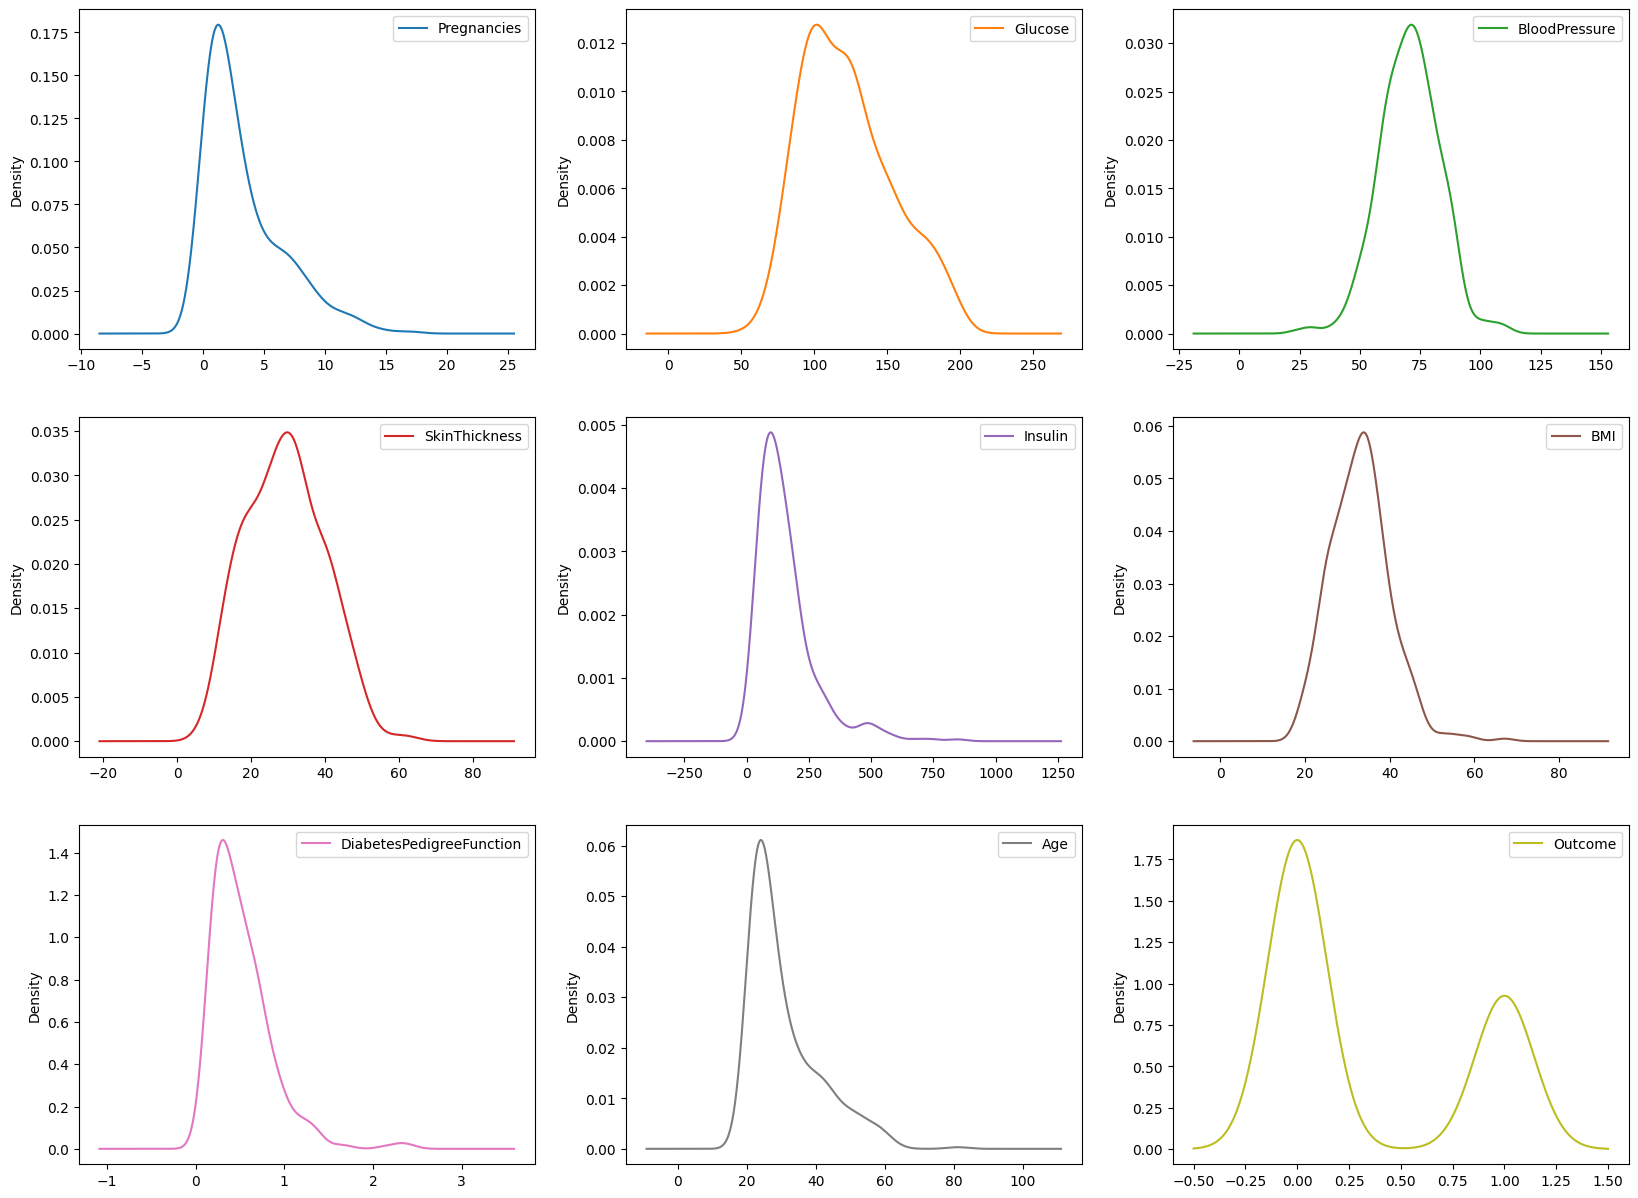

In [ ]:
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

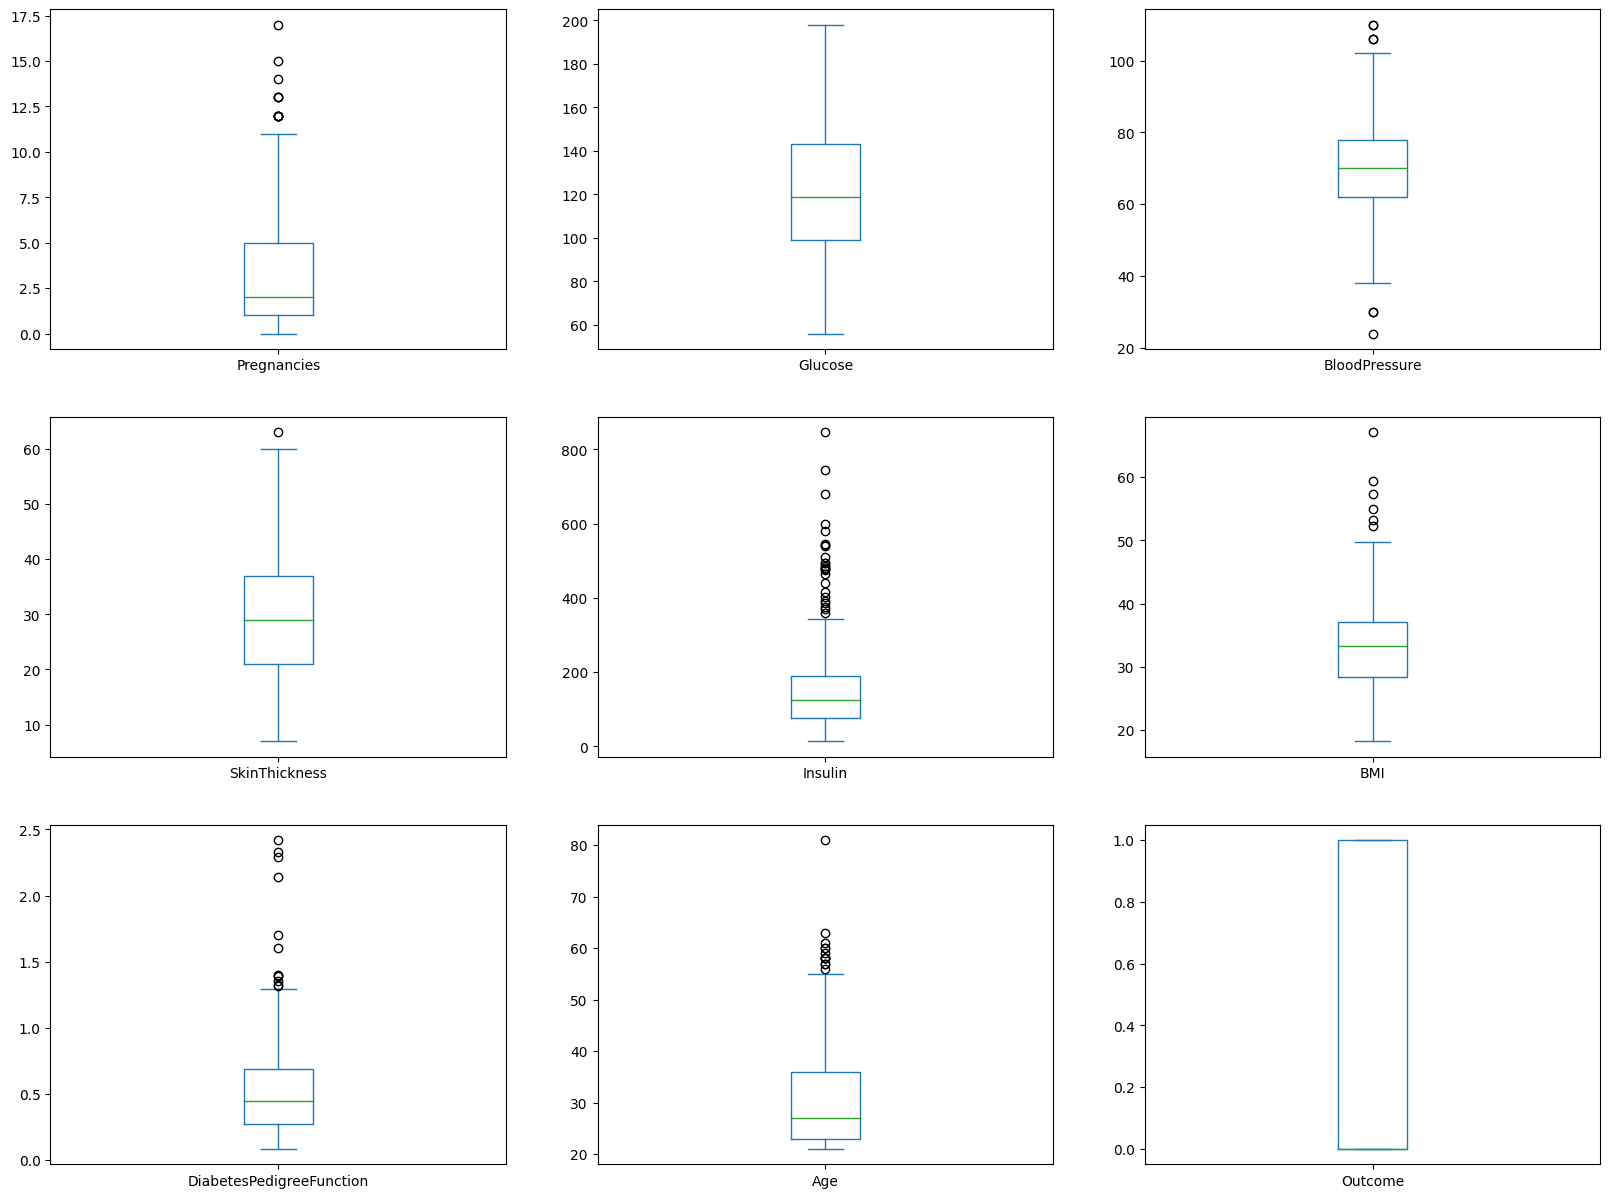

In [ ]:
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [ ]:
corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<Axes: >

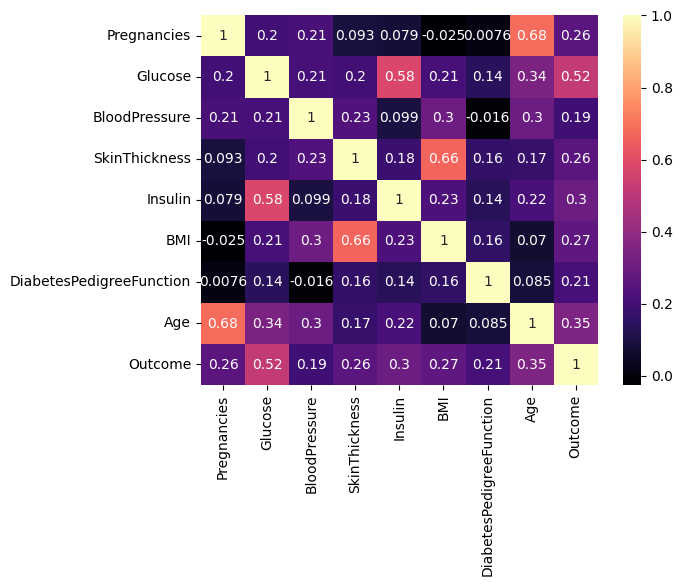

In [ ]:
import seaborn as sns
corr_matrix_pearson = pima_all.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot = True, cmap= 'magma')

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter = 90)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pima_all[features]
y = pima_all.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.74      0.63      0.68        27

    accuracy                           0.80        79
   macro avg       0.78      0.76      0.77        79
weighted avg       0.79      0.80      0.79        79



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data Preparation

In [ ]:
inputss = pima_all[["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]]
outputss = pima_all['Outcome']
input_train, input_test, output_train, output_test = train_test_split(inputss, outputss, test_size=0.2, random_state = 42)

SVM Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

pipeline = Pipeline([
    ('svm', SVC(probability=False, kernel='linear'))])
pipeline.fit(input_train, output_train)
y_pred = pipeline.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("SVM Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

SVM Accuracy: 0.7341772151898734
Precision: 0.6363636363636364
Recall: 0.5185185185185185
F1-score: 0.5714285714285714
average: 0.61512198537515


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(input_train, output_train)
y_pred = rf_classifier.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Random Forest Accuracy: 0.7848101265822784
Precision: 0.7083333333333334
Recall: 0.6296296296296297
F1-score: 0.6666666666666667
average: 0.697359939052977


MLP

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                               learning_rate_init=0.001, max_iter=100, random_state=42)
mlp_classifier.fit(input_train, output_train)
y_pred = mlp_classifier.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("MLP Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

MLP Accuracy: 0.6962025316455697
Precision: 0.56
Recall: 0.5185185185185185
F1-score: 0.5384615384615384
average: 0.5782956471564067


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

np.random.seed(42)
tf.random.set_seed(42)

input_train = np.reshape(input_train.values, (input_train.shape[0], input_train.shape[1], 1))
input_test = np.reshape(input_test.values, (input_test.shape[0], input_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

learning_rate = 0.001
epochs = 50

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_train, output_train, epochs=epochs, batch_size=64, verbose=1)

y_pred_proba = model.predict(input_test)
y_pred = np.round(y_pred_proba)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("CNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Epoch 1/50
5/5 [==============================] - 2s 10ms/step - loss: 8.6376 - accuracy: 0.3674
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 2.5269 - accuracy: 0.6230
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 3.2246 - accuracy: 0.6805
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 2.5906 - accuracy: 0.6805
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 1.5958 - accuracy: 0.6454
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 1.6210 - accuracy: 0.6294
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 1.1072 - accuracy: 0.6581
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 0.9176 - accuracy: 0.6869
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.8118 - accuracy: 0.5655
Epoch 10/50
5/5 [==============================] - 0s 13ms/step - loss: 0.7089 - accuracy: 0.6230
Epoch 11/50
5/5 [==================

RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(input_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_train, output_train, epochs=100, batch_size=128, verbose=1)

y_pred_proba = model.predict(input_test)
y_pred = np.round(y_pred_proba)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("RNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Epoch 1/100
3/3 [==============================] - 1s 11ms/step - loss: 4.1400 - accuracy: 0.6709
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0659 - accuracy: 0.6134
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 1.5732 - accuracy: 0.5080
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7135 - accuracy: 0.6198
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0668 - accuracy: 0.6709
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.6677
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.7358 - accuracy: 0.6613
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6687 - accuracy: 0.6741
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6251 - accuracy: 0.6741
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6135 - accuracy: 0.6550
Epoch 11/100
3/3 [=====

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

input_train = np.array(input_train)
input_test = np.array(input_test)
output_train = np.array(output_train)
output_test = np.array(output_test)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(input_train, output_train)
y_pred = clf.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Accuracy: 0.7088607594936709
Precision: 0.5909090909090909
Recall: 0.48148148148148145
F1-score: 0.5306122448979591
average: 0.5779658941955506


KNN

In [ ]:
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

kk_range = range(1, 50)
kk_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in kk_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, input_train, output_train, cv=10, scoring='accuracy')
    kk_scores.append(scores.mean())
    y_pred = cross_val_predict(knn, input_test, output_test, cv=10)

    accuracy = accuracy_score(output_test, y_pred)
    precision = precision_score(output_test, y_pred)
    recall = recall_score(output_test, y_pred)
    f1 = f1_score(output_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print("Accuracy Scores:", accuracy_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1-Score Scores:", f1_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Accuracy Scores: [0.6075949367088608, 0.6455696202531646, 0.6455696202531646, 0.6708860759493671, 0.6582278481012658, 0.7088607594936709, 0.6962025316455697, 0.7088607594936709, 0.7215189873417721, 0.7215189873417721, 0.7088607594936709, 0.7341772151898734, 0.7088607594936709, 0.7215189873417721, 0.6835443037974683, 0.7341772151898734, 0.6962025316455697, 0.6708860759493671, 0.6835443037974683, 0.6329113924050633, 0.6329113924050633, 0.6329113924050633, 0.6708860759493671, 0.6582278481012658, 0.6708860759493671, 0.6582278481012658, 0.6582278481012658, 0.6329113924050633, 0.6708860759493671, 0.6329113924050633, 0.6708860759493671, 0.6962025316455697, 0.7215189873417721, 0.6835443037974683, 0.6708860759493671, 0.6962025316455697, 0.6962025316455697, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658]
Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Cross-validation accuracy')

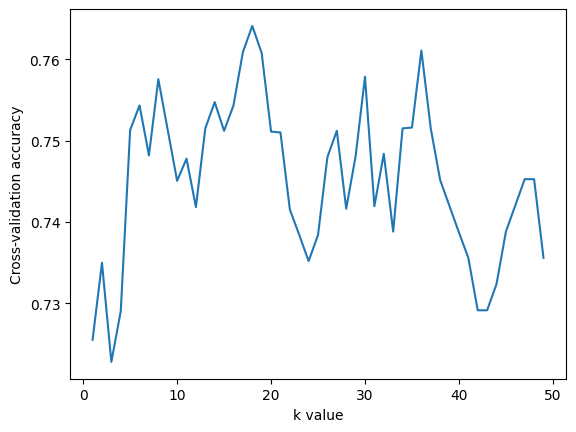

In [ ]:
plt.plot(kk_range, kk_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=18)
scores = cross_val_score(knn, inputss, outputss, cv=10, scoring='accuracy')
accuracy = scores.mean()
y_pred = cross_val_predict(knn, inputss, outputss, cv=10)
precision = precision_score(outputss, y_pred)
recall = recall_score(outputss, y_pred)
f1 = f1_score(outputss, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Accuracy: 0.7651282051282051
Precision: 0.7111111111111111
Recall: 0.49230769230769234
F1-Score: 0.5818181818181818
average: 0.6375912975912976


In [ ]:
from sklearn import metrics

k_range=range(1,50)
k_scores=[]

for k in k_range:
  knn=nei.KNeighborsClassifier(n_neighbors=k)
  knn.fit(input_train,output_train)
  (knn.predict(input_test) == output_test).sum()
  outputs_pred = knn.predict(input_test)
  accuracy = metrics.accuracy_score(output_test, outputs_pred)
  k_scores.append(accuracy)

Text(0, 0.5, 'Cross-validation accuracy')

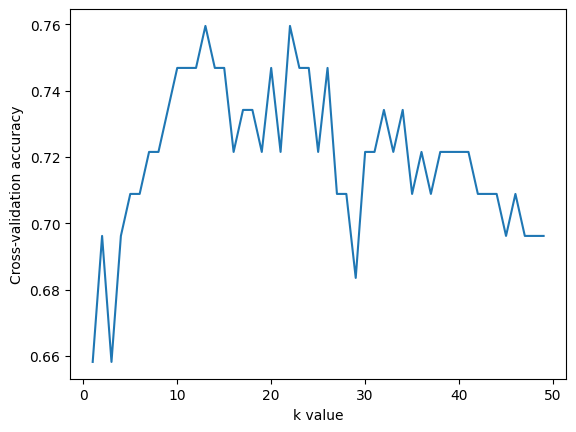

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [ ]:
knn=nei.KNeighborsClassifier(n_neighbors=15)
knn.fit(input_train,output_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
outputs_pred = knn.predict(input_test)
accuracy = metrics.accuracy_score(output_test, outputs_pred)
accuracy

0.7468354430379747

Feature Engineering

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

min_features_to_select = 1
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(inputss, outputss)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

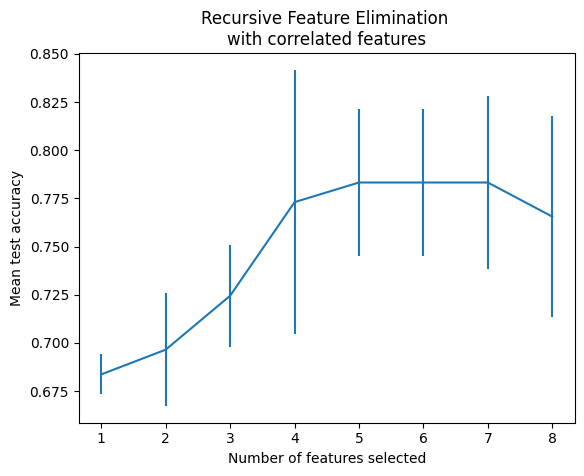

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)

plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
feature_names = pima_all.columns[:10]
X = pima_all[feature_names]
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True),
 ('Glucose', True),
 ('BMI', True),
 ('DiabetesPedigreeFunction', True),
 ('Age', True)]

New features, same models

Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter = 90)
features = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pima_all[features]
y = pima_all.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        52
           1       0.64      0.52      0.57        27

    accuracy                           0.73        79
   macro avg       0.70      0.68      0.69        79
weighted avg       0.73      0.73      0.73        79



SVM

In [ ]:
inputss = pima_all[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
outputss = pima_all['Outcome']
input_train, input_test, output_train, output_test = train_test_split(inputss, outputss, test_size=0.2, random_state = 42)

pipeline = Pipeline([
    ('svm', SVC(probability=False, kernel='linear'))])
pipeline.fit(input_train, output_train)
y_pred = pipeline.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("SVM Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

SVM Accuracy: 0.7341772151898734
Precision: 0.6363636363636364
Recall: 0.5185185185185185
F1-score: 0.5714285714285714
average: 0.61512198537515


Random forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(input_train, output_train)
y_pred = rf_classifier.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Random Forest Accuracy: 0.7721518987341772
Precision: 0.6956521739130435
Recall: 0.5925925925925926
F1-score: 0.6399999999999999
average: 0.6750991663099533


MLP

In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                               learning_rate_init=0.001, max_iter=100, random_state=42)
mlp_classifier.fit(input_train, output_train)
y_pred = mlp_classifier.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("MLP Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

MLP Accuracy: 0.6455696202531646
Precision: 0.4827586206896552
Recall: 0.5185185185185185
F1-score: 0.5
average: 0.5367116898653346


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


CNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input_train = np.reshape(input_train.values, (input_train.shape[0], input_train.shape[1], 1))
input_test = np.reshape(input_test.values, (input_test.shape[0], input_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

learning_rate = 0.001
epochs = 50

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_train, output_train, epochs=epochs, batch_size=64, verbose=1)
y_pred_proba = model.predict(input_test)
y_pred = np.round(y_pred_proba)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("CNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Epoch 1/50
5/5 [==============================] - 3s 21ms/step - loss: 7.8768 - accuracy: 0.6709
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 4.2837 - accuracy: 0.6709
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 1.4886 - accuracy: 0.5431
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 2.0274 - accuracy: 0.3291
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 1.2395 - accuracy: 0.3610
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 1.1620 - accuracy: 0.6613
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 1.0116 - accuracy: 0.6581
Epoch 8/50
5/5 [==============================] - 0s 13ms/step - loss: 0.8575 - accuracy: 0.3674
Epoch 9/50
5/5 [==============================] - 0s 13ms/step - loss: 0.8344 - accuracy: 0.3898
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7738 - accuracy: 0.6709
Epoch 11/50
5/5 [============

RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(input_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_train, output_train, epochs=100, batch_size=128, verbose=1)

y_pred_proba = model.predict(input_test)
y_pred = np.round(y_pred_proba)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("RNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Epoch 1/100
3/3 [==============================] - 4s 12ms/step - loss: 2.4332 - accuracy: 0.6741
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 1.3803 - accuracy: 0.3898
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8227 - accuracy: 0.6006
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.8966 - accuracy: 0.6709
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.6645
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7277 - accuracy: 0.5144
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6762 - accuracy: 0.6677
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6628 - accuracy: 0.6869
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6765 - accuracy: 0.5559
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6354 - accuracy: 0.6070
Epoch 11/100
3/3 [=

Decision Tree

In [ ]:
input_train = np.array(input_train)
input_test = np.array(input_test)
output_train = np.array(output_train)
output_test = np.array(output_test)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(input_train, output_train)
y_pred = clf.predict(input_test)

accuracy = accuracy_score(output_test, y_pred)
precision = precision_score(output_test, y_pred)
recall = recall_score(output_test, y_pred)
f1 = f1_score(output_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Accuracy: 0.7088607594936709
Precision: 0.5833333333333334
Recall: 0.5185185185185185
F1-score: 0.5490196078431373
average: 0.5899330547971651


KNN

In [ ]:
kk_range = range(1, 50)
kk_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in kk_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, input_train, output_train, cv=10, scoring='accuracy')
    kk_scores.append(scores.mean())
    y_pred = cross_val_predict(knn, input_test, output_test, cv=10)

    accuracy = accuracy_score(output_test, y_pred)
    precision = precision_score(output_test, y_pred)
    recall = recall_score(output_test, y_pred)
    f1 = f1_score(output_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print("Accuracy Scores:", accuracy_scores)
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1-Score Scores:", f1_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Scores: [0.6962025316455697, 0.6962025316455697, 0.6962025316455697, 0.7088607594936709, 0.6962025316455697, 0.6962025316455697, 0.7215189873417721, 0.6962025316455697, 0.7215189873417721, 0.6962025316455697, 0.7088607594936709, 0.7088607594936709, 0.7088607594936709, 0.7088607594936709, 0.7468354430379747, 0.7341772151898734, 0.7468354430379747, 0.7468354430379747, 0.7341772151898734, 0.7468354430379747, 0.7468354430379747, 0.7468354430379747, 0.7468354430379747, 0.7341772151898734, 0.7341772151898734, 0.7468354430379747, 0.7341772151898734, 0.7341772151898734, 0.7468354430379747, 0.759493670886076, 0.759493670886076, 0.759493670886076, 0.759493670886076, 0.7341772151898734, 0.7215189873417721, 0.7088607594936709, 0.7215189873417721, 0.7215189873417721, 0.7215189873417721, 0.6962025316455697, 0.6835443037974683, 0.6582278481012658, 0.6835443037974683, 0.6708860759493671, 0.6329113924050633, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658, 0.6582278481012658]
Precis

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=18)
scores = cross_val_score(knn, inputss, outputss, cv=10, scoring='accuracy')
accuracy = scores.mean()
y_pred = cross_val_predict(knn, inputss, outputss, cv=10)
precision = precision_score(outputss, y_pred)
recall = recall_score(outputss, y_pred)
f1 = f1_score(outputss, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print( "average:", (accuracy + precision + recall + f1) / 4)

Accuracy: 0.7856410256410257
Precision: 0.75
Recall: 0.5307692307692308
F1-Score: 0.6216216216216217
average: 0.6720079695079695
